In [1]:
''' IMPORT ALL THE THINGS '''
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
import pandas as pd

In [ ]:
''' DEFINE PATH TO THE DATASETS '''

'''CWD = os.getcwd().replace('\\','/') # get current workspace directory
IMAGE_DIR = f'{CWD}/images'
TRAIN_DATASET_DIR = f'{IMAGE_DIR}/train'
TEST_DATASET_DIR = f'{IMAGE_DIR}/test'
VAL_DATASET_DIR = f'{IMAGE_DIR}/validation'

CATEGORIES = ['clementine','grapefruit','orange']'''

# print('CWD :',CWD)
# print('IMAGE_DIR :',IMAGE_DIR)
# print('TRAIN_DATASET_DIR :',TRAIN_DATASET_DIR)
# print('TEST_DATASET_DIR :',TEST_DATASET_DIR)
# print('VAL_DATASET_DIR :',VAL_DATASET_DIR)
# print('CATEGORIES :', CATEGORIES)

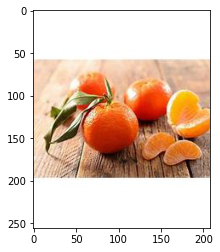

In [5]:
img = image.load_img("/basedata/train/clementine/1.jpg")
plt.imshow(img)

**กำหนด path ใหม่ เพราะ run จาก machine บน google colab**

In [9]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [10]:
train_dataset = train.flow_from_directory("/basedata/train",
                                          target_size=(224,224),
                                          batch_size = 3,
                                          class_mode ="categorical")

validation_dataset = validation.flow_from_directory("/basedata/validation",
                                          target_size=(224,224),
                                          batch_size = 3,
                                          class_mode ="categorical")

Found 1990 images belonging to 3 classes.
Found 567 images belonging to 3 classes.


In [12]:
train_dataset.class_indices

{'clementine': 0, 'grapefruit': 1, 'orange': 2}

In [13]:
validation_dataset.class_indices

{'clementine': 0, 'grapefruit': 1, 'orange': 2}

In [ ]:
''' Create Augmented Data '''

' Create Augmented Data '

In [14]:
''' Get pre train model '''
VGG = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
VGG.trainable = False

In [15]:
''' Create a model '''
model = tf.keras.models.Sequential([
                                    VGG,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [16]:
model.summary() # show all the model's layer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 21,204,035
Trainable params: 6,489,347
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
''' Compiling '''

opt = tf.keras.optimizers.Adam(learning_rate=0.001) ### can be changed
los = tf.keras.losses.BinaryCrossentropy()  ### can be changed
met = tf.keras.metrics.Accuracy()  ### can be changed

model.compile(optimizer=opt, loss=los, metrics=met)


In [ ]:
''' Training '''
model.fit(
    train_dataset, # both data and label cause we use ImageDataGenerator
    validation_data=valid_dataset,
    epochs=10, ### can be change
    shuffle=True 
)


In [ ]:
''' Evaluating '''

In [ ]:
''' Predicting '''